In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [2]:
df1=pd.read_csv("confirmed.csv")
df1.head(40)


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,176918,176983,177039,177093,177191,177255,177321,177321,177321,177321
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,272885,272961,273040,273088,273088,273146,273164,273257,273318,273387
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,265511,265524,265539,265550,265562,265573,265585,265599,265612,265621
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,39234,39234,39234,39234,39234,39234,39713,39713,39713,39713
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,99003,99003,99003,99003,99010,99058,99058,99081,99102,99106
5,NaN,Antarctica,-71.949900,23.347000,0,0,0,0,0,0,...,11,11,11,11,11,11,11,11,11,11
6,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,7470,7470,7473,7473,7473,7473,7482,7482,7482,7482
7,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,8990413,9004829,9006526,9007753,9011367,9016057,9019660,9021240,9023812,9025257
8,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,422202,422254,422286,422307,422328,422354,422382,422401,422423,422444
9,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,64219,65341,66267,67243,68257,69571,70659,71683,72571,73344


In [3]:
df1.isnull().sum()

Province/State    195
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/22/22             0
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
Length: 799, dtype: int64

In [4]:
df1.drop(df1.iloc[:,2:len(df1.columns)-7], axis = 1, inplace=True)
# df1[df1['Country/Region']=='Germany']

In [5]:
df1_m=df1.melt(id_vars=['Country/Region', 'Province/State'])
df1_m
df1_m[df1_m['Country/Region']=='Germany']

,Country/Region,Province/State,variable,value
135,Germany,NaN,3/20/22,18809998
419,Germany,NaN,3/21/22,18810035
703,Germany,NaN,3/22/22,19058757
987,Germany,NaN,3/23/22,19217142
1271,Germany,NaN,3/24/22,19365628
1555,Germany,NaN,3/25/22,19487710
1839,Germany,NaN,3/26/22,19492672


In [6]:
df1_m.rename(columns={'variable':'Date','Province/State':'State','Country/Region':'Country','value':'confirmed'},inplace=True)

In [8]:
df2=pd.read_csv("recovered.csv")
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df2.isnull().sum()

Province/State    196
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
3/22/22             0
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
Length: 799, dtype: int64

In [10]:
df2.drop(df2.iloc[:,2:len(df2.columns)-7], axis = 1, inplace=True)
df2

,Province/State,Country/Region,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,0,0,0,0,0,0,0
1,NaN,Albania,0,0,0,0,0,0,0
2,NaN,Algeria,0,0,0,0,0,0,0
3,NaN,Andorra,0,0,0,0,0,0,0
4,NaN,Angola,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
264,NaN,West Bank and Gaza,0,0,0,0,0,0,0
265,NaN,Winter Olympics 2022,0,0,0,0,0,0,0
266,NaN,Yemen,0,0,0,0,0,0,0
267,NaN,Zambia,0,0,0,0,0,0,0


In [11]:
df2_m=df2.melt(id_vars=['Country/Region', 'Province/State'])
df2_m

,Country/Region,Province/State,variable,value
0,Afghanistan,NaN,3/20/22,0
1,Albania,NaN,3/20/22,0
2,Algeria,NaN,3/20/22,0
3,Andorra,NaN,3/20/22,0
4,Angola,NaN,3/20/22,0
...,...,...,...,...
1878,West Bank and Gaza,NaN,3/26/22,0
1879,Winter Olympics 2022,NaN,3/26/22,0
1880,Yemen,NaN,3/26/22,0
1881,Zambia,NaN,3/26/22,0


In [12]:
df2_m.rename(columns={'variable':'Date_1','Province/State':'State_1','Country/Region':'Country_1','value':'recovered'},inplace=True)
df2_m

,Country_1,State_1,Date_1,recovered
0,Afghanistan,NaN,3/20/22,0
1,Albania,NaN,3/20/22,0
2,Algeria,NaN,3/20/22,0
3,Andorra,NaN,3/20/22,0
4,Angola,NaN,3/20/22,0
...,...,...,...,...
1878,West Bank and Gaza,NaN,3/26/22,0
1879,Winter Olympics 2022,NaN,3/26/22,0
1880,Yemen,NaN,3/26/22,0
1881,Zambia,NaN,3/26/22,0


In [13]:
df3=pd.read_csv("deaths.csv")
df3.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/22,3/18/22,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7651,7651,7652,7654,7654,7656,7657,7657,7657,7657
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3487,3487,3487,3487,3487,3489,3489,3489,3490,3491
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6870,6871,6871,6871,6872,6873,6873,6873,6873,6873
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,153,153,155,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900


In [14]:
df3.drop(df3.iloc[:,2:len(df3.columns)-7], axis = 1, inplace=True)
df3

,Province/State,Country/Region,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,7654,7654,7656,7657,7657,7657,7657
1,NaN,Albania,3487,3487,3489,3489,3489,3490,3491
2,NaN,Algeria,6871,6872,6873,6873,6873,6873,6873
3,NaN,Andorra,153,153,153,153,155,153,153
4,NaN,Angola,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,5628,5641,5641,5641,5649,5649,5649
280,NaN,Winter Olympics 2022,0,0,0,0,0,0,0
281,NaN,Yemen,2140,2142,2142,2142,2142,2142,2142
282,NaN,Zambia,3962,3963,3963,3964,3965,3966,3966


In [15]:
df3.isnull().sum()

Province/State    195
Country/Region      0
3/20/22             0
3/21/22             0
3/22/22             0
3/23/22             0
3/24/22             0
3/25/22             0
3/26/22             0
dtype: int64

In [16]:
df3_m=df3.melt(id_vars=['Country/Region','Province/State'])
df3_m

,Country/Region,Province/State,variable,value
0,Afghanistan,NaN,3/20/22,7654
1,Albania,NaN,3/20/22,3487
2,Algeria,NaN,3/20/22,6871
3,Andorra,NaN,3/20/22,153
4,Angola,NaN,3/20/22,1900
...,...,...,...,...
1983,West Bank and Gaza,NaN,3/26/22,5649
1984,Winter Olympics 2022,NaN,3/26/22,0
1985,Yemen,NaN,3/26/22,2142
1986,Zambia,NaN,3/26/22,3966


In [17]:
df3_m.rename(columns={'variable':'Date_2','Province/State':'State_2','Country/Region':'Country_2','value':'death'},inplace=True)
df3_m

,Country_2,State_2,Date_2,death
0,Afghanistan,NaN,3/20/22,7654
1,Albania,NaN,3/20/22,3487
2,Algeria,NaN,3/20/22,6871
3,Andorra,NaN,3/20/22,153
4,Angola,NaN,3/20/22,1900
...,...,...,...,...
1983,West Bank and Gaza,NaN,3/26/22,5649
1984,Winter Olympics 2022,NaN,3/26/22,0
1985,Yemen,NaN,3/26/22,2142
1986,Zambia,NaN,3/26/22,3966


In [18]:
df3

,Province/State,Country/Region,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22
0,NaN,Afghanistan,7654,7654,7656,7657,7657,7657,7657
1,NaN,Albania,3487,3487,3489,3489,3489,3490,3491
2,NaN,Algeria,6871,6872,6873,6873,6873,6873,6873
3,NaN,Andorra,153,153,153,153,155,153,153
4,NaN,Angola,1900,1900,1900,1900,1900,1900,1900
...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,5628,5641,5641,5641,5649,5649,5649
280,NaN,Winter Olympics 2022,0,0,0,0,0,0,0
281,NaN,Yemen,2140,2142,2142,2142,2142,2142,2142
282,NaN,Zambia,3962,3963,3963,3964,3965,3966,3966


In [19]:
covid =pd.concat([df1_m,df2_m,df3_m], axis=1)
covid

,Country,State,Date,confirmed,Country_1,State_1,Date_1,recovered,Country_2,State_2,Date_2,death
0,Afghanistan,NaN,3/20/22,177093,Afghanistan,NaN,3/20/22,0.0,Afghanistan,NaN,3/20/22,7654
1,Albania,NaN,3/20/22,273088,Albania,NaN,3/20/22,0.0,Albania,NaN,3/20/22,3487
2,Algeria,NaN,3/20/22,265550,Algeria,NaN,3/20/22,0.0,Algeria,NaN,3/20/22,6871
3,Andorra,NaN,3/20/22,39234,Andorra,NaN,3/20/22,0.0,Andorra,NaN,3/20/22,153
4,Angola,NaN,3/20/22,99003,Angola,NaN,3/20/22,0.0,Angola,NaN,3/20/22,1900
...,...,...,...,...,...,...,...,...,...,...,...,...
1983,West Bank and Gaza,NaN,3/26/22,655468,NaN,NaN,NaN,NaN,West Bank and Gaza,NaN,3/26/22,5649
1984,Winter Olympics 2022,NaN,3/26/22,535,NaN,NaN,NaN,NaN,Winter Olympics 2022,NaN,3/26/22,0
1985,Yemen,NaN,3/26/22,11803,NaN,NaN,NaN,NaN,Yemen,NaN,3/26/22,2142
1986,Zambia,NaN,3/26/22,316501,NaN,NaN,NaN,NaN,Zambia,NaN,3/26/22,3966


In [20]:
covid[covid['Country']=='Turkey']

,Country,State,Date,confirmed,Country_1,State_1,Date_1,recovered,Country_2,State_2,Date_2,death
255,Turkey,NaN,3/20/22,14693917,United Kingdom,Montserrat,3/20/22,0.0,Turkey,NaN,3/20/22,97267
539,Turkey,NaN,3/21/22,14708850,Albania,NaN,3/22/22,0.0,Turkey,NaN,3/21/22,97347
823,Turkey,NaN,3/22/22,14726276,Australia,Western Australia,3/23/22,0.0,Turkey,NaN,3/22/22,97437
1107,Turkey,NaN,3/23/22,14743437,Brazil,NaN,3/24/22,0.0,Turkey,NaN,3/23/22,97521
1391,Turkey,NaN,3/24/22,14760331,China,Chongqing,3/25/22,0.0,Turkey,NaN,3/24/22,97598
1675,Turkey,NaN,3/25/22,14775634,China,Jiangxi,3/26/22,0.0,Turkey,NaN,3/25/22,97666
1959,Turkey,NaN,3/26/22,14789483,NaN,NaN,NaN,NaN,Turkey,NaN,3/26/22,97736


In [21]:
covid=covid[["Date","State","Country","confirmed","death","recovered"]]
covid

,Date,State,Country,confirmed,death,recovered
0,3/20/22,NaN,Afghanistan,177093,7654,0.0
1,3/20/22,NaN,Albania,273088,3487,0.0
2,3/20/22,NaN,Algeria,265550,6871,0.0
3,3/20/22,NaN,Andorra,39234,153,0.0
4,3/20/22,NaN,Angola,99003,1900,0.0
...,...,...,...,...,...,...
1983,3/26/22,NaN,West Bank and Gaza,655468,5649,NaN
1984,3/26/22,NaN,Winter Olympics 2022,535,0,NaN
1985,3/26/22,NaN,Yemen,11803,2142,NaN
1986,3/26/22,NaN,Zambia,316501,3966,NaN


In [22]:
grouped = covid.groupby(['Country','Date'])
covid_confirmed = grouped.sum().reset_index().sort_values(by=['Date','death'],ascending=False)
covid_confirmed

,Country,Date,confirmed,death,recovered
1287,US,3/26/22,79946097,976652,0.0
174,Brazil,3/26/22,29839103,659046,0.0
566,India,3/26/22,43019453,521004,0.0
1021,Russia,3/26/22,17481799,359693,0.0
818,Mexico,3/26/22,5647041,322634,0.0
...,...,...,...,...,...
791,Marshall Islands,3/20/22,7,0,0.0
819,Micronesia,3/20/22,1,0,0.0
1050,Samoa,3/20/22,111,0,0.0
1176,Summer Olympics 2020,3/20/22,865,0,0.0


In [23]:
grouped_d = covid.groupby(['Country'])
covid_confirmed_d = grouped_d.sum().reset_index().sort_values(by=['confirmed','death'],ascending=False)
covid_confirmed_d.head(30)

,Country,confirmed,death,recovered
183,US,558934531,6820883,0.0
80,India,301101654,3624944,0.0
24,Brazil,208142339,4607882,0.0
63,France,172780607,996422,0.0
187,United Kingdom,144417922,1152559,0.0
67,Germany,134241942,891061,0.0
145,Russia,121847723,2509390,0.0
182,Turkey,103197928,682572,0.0
86,Italy,98506177,1107762,0.0
165,Spain,79688978,714349,0.0


In [24]:
covid_confirmed['Country'].unique()

array(['US', 'Brazil', 'India', 'Russia', 'Mexico', 'Peru',
       'United Kingdom', 'Italy', 'Indonesia', 'France', 'Iran',
       'Colombia', 'Argentina', 'Germany', 'Poland', 'Ukraine', 'Spain',
       'South Africa', 'Turkey', 'Romania', 'Philippines', 'Chile',
       'Hungary', 'Vietnam', 'Czechia', 'Canada', 'Bulgaria', 'Ecuador',
       'Malaysia', 'Belgium', 'Pakistan', 'Bangladesh', 'Tunisia',
       'Japan', 'Greece', 'Iraq', 'Thailand', 'Egypt', 'Netherlands',
       'Portugal', 'Bolivia', 'Burma', 'Slovakia', 'Kazakhstan',
       'Paraguay', 'Sweden', 'Guatemala', 'Georgia', 'Sri Lanka',
       'Morocco', 'Serbia', 'Bosnia and Herzegovina', 'Austria',
       'Croatia', 'Korea, South', 'Jordan', 'Switzerland', 'Nepal',
       'China', 'Moldova', 'Honduras', 'Israel', 'Lebanon', 'Azerbaijan',
       'North Macedonia', 'Saudi Arabia', 'Lithuania', 'Armenia', 'Cuba',
       'Costa Rica', 'Panama', 'Afghanistan', 'Ethiopia', 'Uruguay',
       'Algeria', 'Belarus', 'Ireland', 'Sl

In [25]:
covid_confirmed.dtypes

Country       object
Date          object
confirmed      int64
death          int64
recovered    float64
dtype: object

In [26]:
# covid_confirmed[covid_confirmed['Date']=='9/9/21']

In [27]:
df = (covid_confirmed[covid_confirmed['Date']=='3/25/22'].sort_values(by="confirmed",ascending=False)).head(10)
df

,Country,Date,confirmed,death,recovered
1286,US,3/25/22,79936777,976505,0.0
565,India,3/25/22,43018032,520855,0.0
173,Brazil,3/25/22,29809769,658855,0.0
446,France,3/25/22,24967222,142597,0.0
1314,United Kingdom,3/25/22,20848912,165046,0.0
474,Germany,3/25/22,19487710,127599,0.0
1020,Russia,3/25/22,17458275,359307,0.0
1279,Turkey,3/25/22,14775634,97666,0.0
607,Italy,3/25/22,14229495,158582,0.0
656,"Korea, South",3/25/22,11497711,14617,0.0


Text(0, 0.5, 'Country')

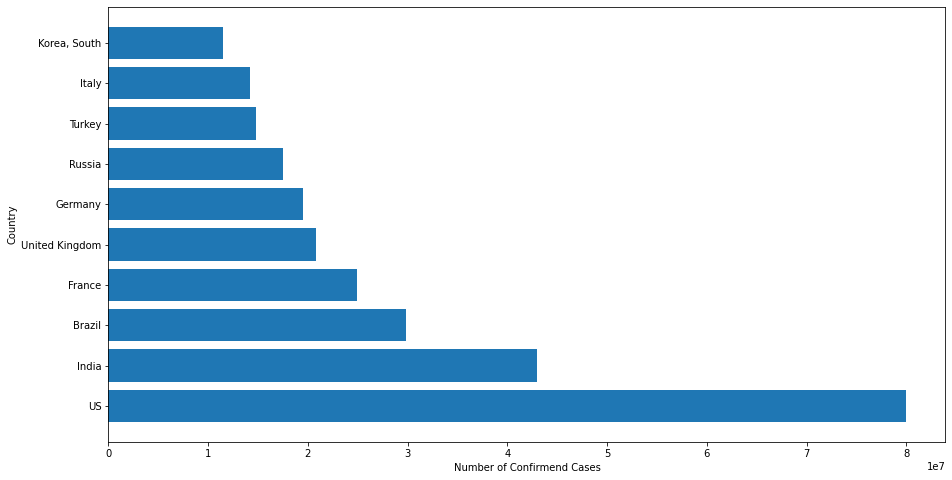

In [28]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df['Country'], df['confirmed'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

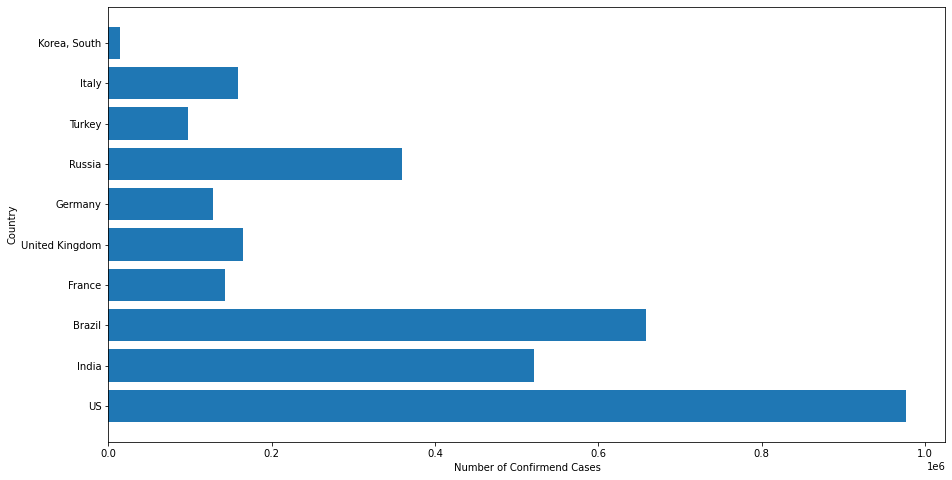

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(df['Country'], df['death'])
plt.xlabel('Number of Confirmend Cases')
plt.ylabel('Country')

Text(0, 0.5, 'Country')

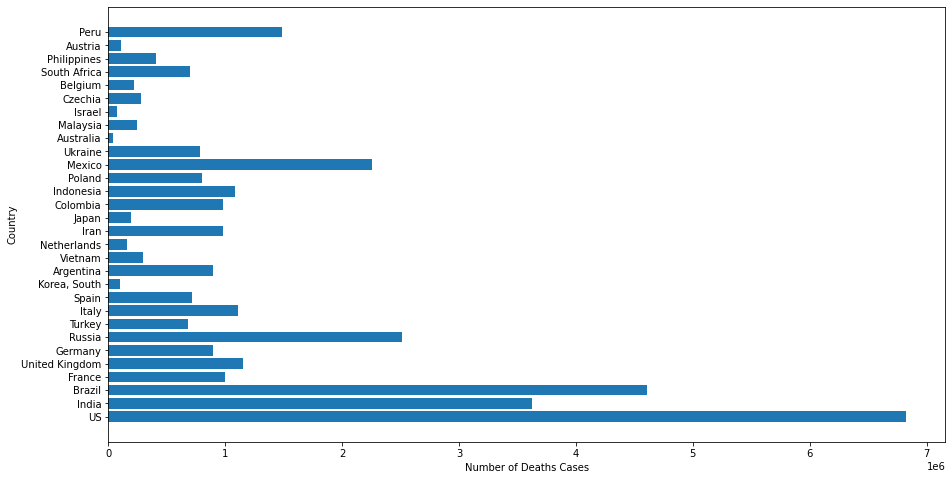

In [30]:
c=covid_confirmed_d.head(30)
fig, ax = plt.subplots(figsize=(15, 8))
ax.barh(c['Country'], c['death'])
plt.xlabel('Number of Deaths Cases')
plt.ylabel('Country')

In [31]:
df_t = (covid_confirmed[covid_confirmed['Date']=='3/21/22'].sort_values(by="confirmed",ascending=True).head(10))
df_t

,Country,Date,confirmed,death,recovered
820,Micronesia,3/21/22,1,0,0.0
792,Marshall Islands,3/21/22,7,0,0.0
743,MS Zaandam,3/21/22,9,2,0.0
36,Antarctica,3/21/22,11,0,0.0
533,Holy See,3/21/22,29,0,0.0
1051,Samoa,3/21/22,229,0,0.0
1359,Winter Olympics 2022,3/21/22,535,0,0.0
344,Diamond Princess,3/21/22,712,13,0.0
1177,Summer Olympics 2020,3/21/22,865,0,0.0
1331,Vanuatu,3/21/22,1025,1,0.0


Text(0, 0.5, 'Country')

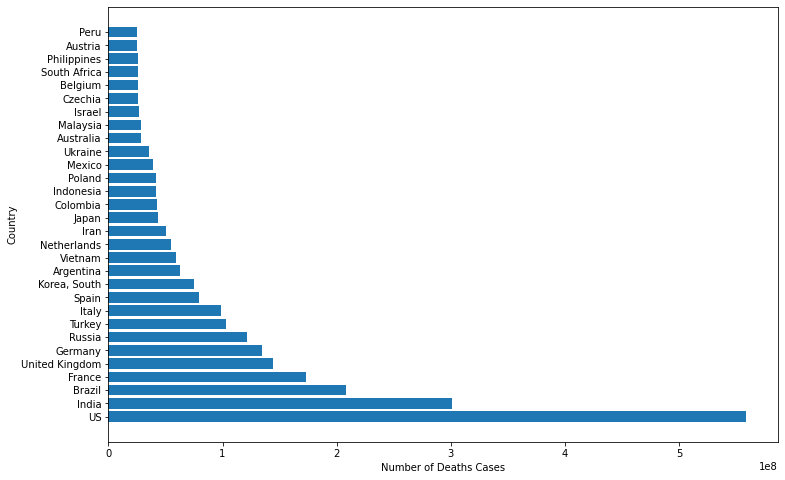

In [32]:
c=covid_confirmed_d.head(30)
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(c['Country'], c['confirmed'])
plt.xlabel('Number of Deaths Cases')
plt.ylabel('Country')

In [33]:
modified_confirmed = covid_confirmed[covid_confirmed.confirmed > 0]

<AxesSubplot:ylabel='Density'>

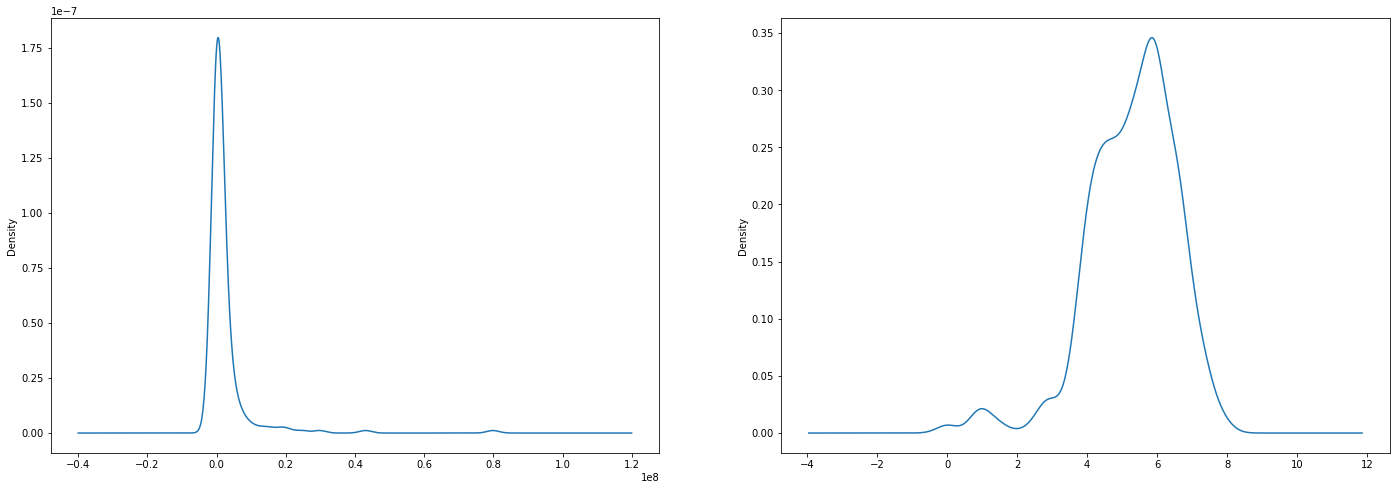

In [34]:
plt.subplots(figsize=(24,8))
plt.subplot(1,2,1)
(modified_confirmed.confirmed).plot.kde()
plt.subplot(1,2,2)
(np.log10(modified_confirmed.confirmed)).plot.kde()

In [35]:
modified_confirmed_d= covid_confirmed_d[covid_confirmed_d.confirmed > 0]

<AxesSubplot:ylabel='Density'>

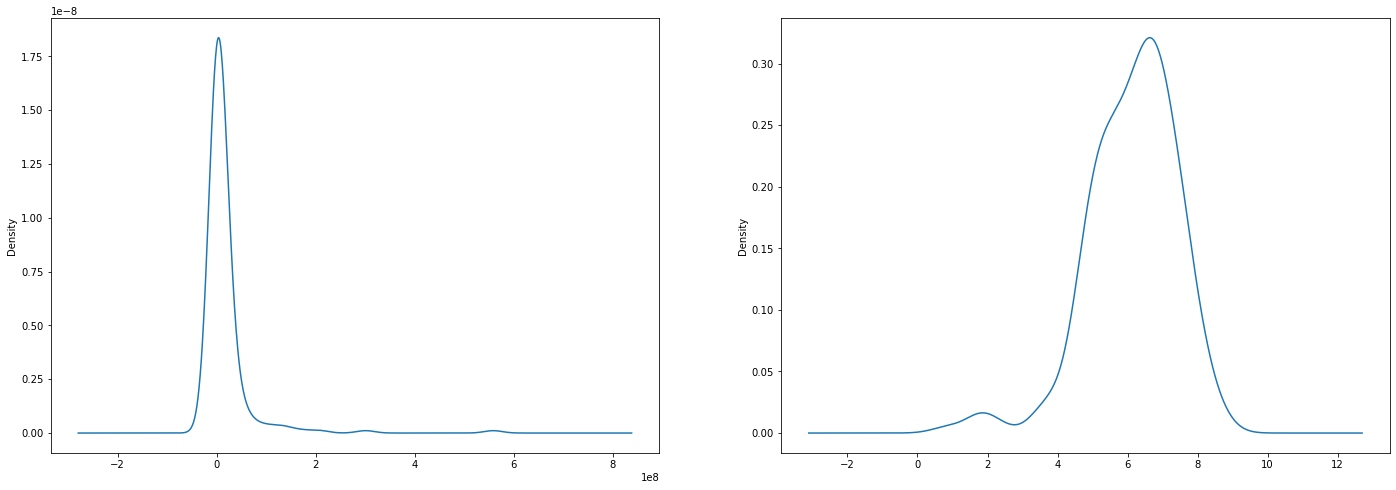

In [36]:
plt.subplots(figsize=(24,8))
plt.subplot(1,2,1)
(modified_confirmed_d.confirmed).plot.kde()
plt.subplot(1,2,2)
(np.log10(modified_confirmed_d.confirmed)).plot.kde()

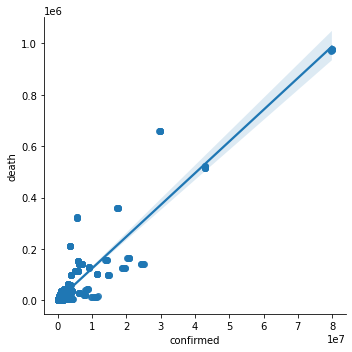

In [37]:
sns.lmplot(x="confirmed", y="death", data=covid_confirmed);

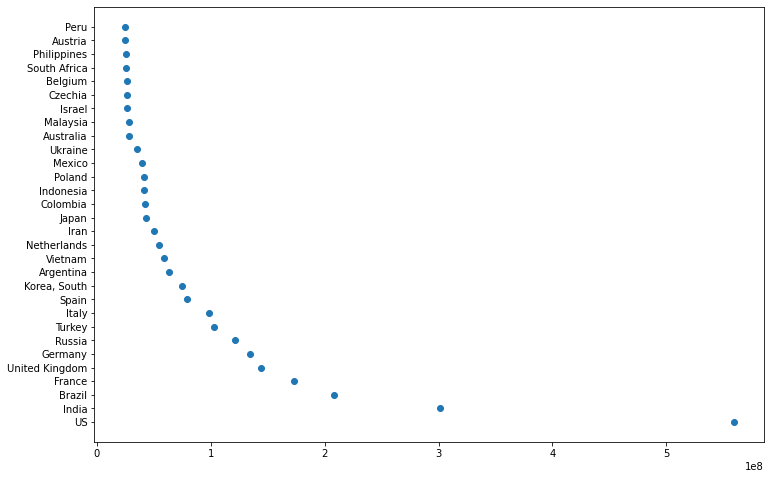

In [38]:
plt.subplots(figsize=(12,8))
c=covid_confirmed_d.head(30)
plt.scatter(c['confirmed'], c['Country'])

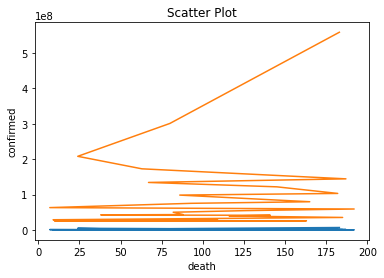

In [39]:
plt.plot(c['death'])
plt.plot(c['confirmed'])
plt.title("Scatter Plot")

plt.xlabel('death')
plt.ylabel('confirmed')
  
plt.show()

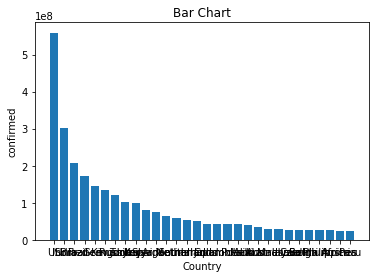

In [40]:
# 1 həftə yoluxma saylarına görə 10 ölkə müqayisəplt.subplots(figsize=(35,8))
plt.bar( c['Country'],c['confirmed'])
  
plt.title("Bar Chart")
  
plt.xlabel('Country')
plt.ylabel('confirmed')
  
plt.show()

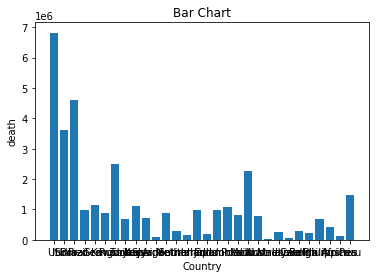

In [41]:
# 1 həftə yoluxma saylarının cəmi 30 ölkə üçün müqayisəplt.subplots(figsize=(35,8))
plt.bar( c['Country'],c['death'])
  
plt.title("Bar Chart")
  
plt.xlabel('Country')
plt.ylabel('death')
  
plt.show()

Text(0.5, 1.0, 'Histogram')

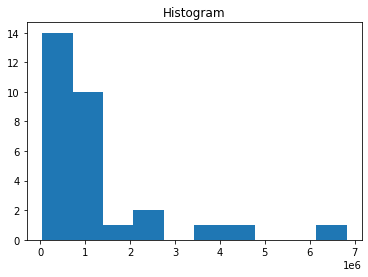

In [42]:
plt.hist(c['death'])
  
plt.title("Histogram")

Text(0.5, 1.0, 'Histogram')

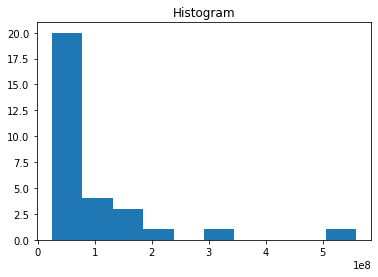

In [43]:
plt.hist(c['confirmed'])
  
plt.title("Histogram")

In [44]:
d=covid_confirmed_d.head(10)
d

,Country,confirmed,death,recovered
183,US,558934531,6820883,0.0
80,India,301101654,3624944,0.0
24,Brazil,208142339,4607882,0.0
63,France,172780607,996422,0.0
187,United Kingdom,144417922,1152559,0.0
67,Germany,134241942,891061,0.0
145,Russia,121847723,2509390,0.0
182,Turkey,103197928,682572,0.0
86,Italy,98506177,1107762,0.0
165,Spain,79688978,714349,0.0


<Figure size 2160x576 with 0 Axes>

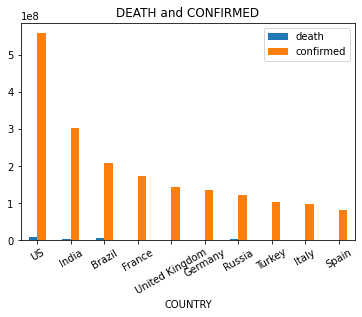

In [45]:
# 1 həftə yoluxma saylarının cəmi 30 ölkə üçün müqayisə
plt.figure(figsize=(30,8))
# plt.figure(figsize=(15,4))
d.plot.bar(x='Country', y=['death','confirmed'], rot=30)
plt.title('DEATH and CONFIRMED')
plt.xlabel('COUNTRY')

plt.legend()
plt.show()